In [1]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join('..')))
from ch07_autograd.utils import Scalar, draw_graph

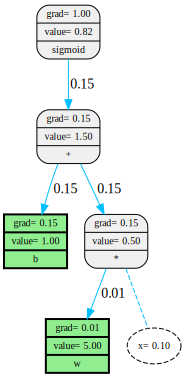

In [2]:
# 为了图形简洁易懂，假设只有一个权重项参数
## 当线性输出较小时，梯度不会溢出
w = Scalar(5.0, label='w')
b = Scalar(1.0, label='b')
x = Scalar(0.1, label='x', requires_grad=False)
h = w * x + b
l = h.sigmoid()
l.backward()
draw_graph(l, 'backward')

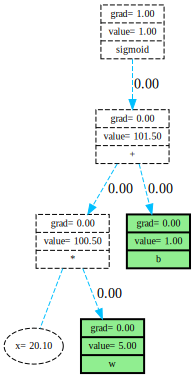

In [3]:
# 当线性输出较大时，梯度溢出
w = Scalar(5.0, label='w')
b = Scalar(1.0, label='b')
x = Scalar(20.1, label='x', requires_grad=False)
h = w * x + b
l = h.sigmoid()
l.backward()
draw_graph(l, 'backward')

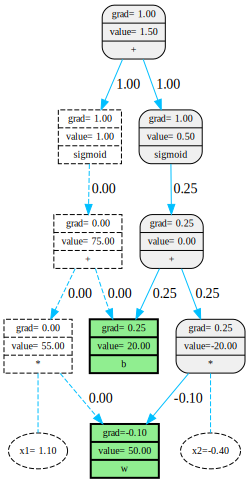

In [4]:
# 不同数据点的反向传播是相互独立的
w = Scalar(50.0, label='w')
b = Scalar(20.0, label='b')
x1 = Scalar(1.1, label='x1', requires_grad=False)
x2 = Scalar(-0.4, label='x2', requires_grad=False)
h1 = w * x1 + b
l1 = h1.sigmoid()
h2 = w * x2 + b
l2 = h2.sigmoid()
l = l1 + l2
l.backward()
draw_graph(l, 'backward')

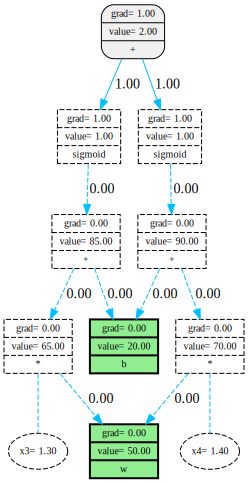

In [5]:
# 当对于所有数据，相应的线性输出都较大时，该神经元相当于坏死掉
w = Scalar(50.0, label='w')
b = Scalar(20.0, label='b')
x3 = Scalar(1.3, label='x3', requires_grad=False)
x4 = Scalar(1.4, label='x4', requires_grad=False)
h3 = w * x3 + b
l3 = h3.sigmoid()
h4 = w * x4 + b
l4 = h4.sigmoid()
l = l3 + l4
l.backward()
draw_graph(l, 'backward')